In [3]:
!pip install langchain langgraph cassio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 62.3 MB/s eta 0:00:00


In [4]:
import cassio

In [5]:
# Connection to AstraDB
astra_db_token =  "AstraCS:iqNrLqpHlrlMATpcoOrcDYSh:27d3947bb7b98c17f4dcc8dfeea051b43960ee3efb7c2ad388a6a416dd996a4a"
astra_db_id = "58e4f98f-da64-4b48-a771-4d984ec505e3"
cassio.init(token= astra_db_token,database_id=astra_db_id)

In [6]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.19
    Uninstalling langchain-core-0.3.19:
      Successfully uninstalled langchain-core-0.3.19
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.7
    Uninstalling langchain-0.3.7:
      Successfully uninstalled langchain-0.3.7


In [7]:
!pip install -U langchain_community tiktoken langchain-groq langchainhub chromadb langchain langgraph langchain_huggingface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.9/617.9 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.5 MB/s eta 0:00:0

In [80]:
### Building Index

from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
import tiktoken

# Docs to index
urls = [
    "https://www.atfx.com/en/analysis/trading-strategies/forex-news-trading-strategy",
    "https://www.cmcmarkets.com/en/trading-guides/trading-strategies",
    "https://optimusfutures.com/blog/end-of-day-trading-strategies/",
    "https://www.captrader.com/en/blog/swing-trading-strategy/",
    "https://www.sofi.com/learn/content/day-trading-strategies/",
    "https://faculty.haas.berkeley.edu/odean/papers/Day%20Traders/Day%20Trade%20040330.pdf",
    "https://pmc.ncbi.nlm.nih.gov/articles/PMC10102421/",
    "https://dl.acm.org/doi/pdf/10.1145/3572647.3572684"
]

# Load
docs = [WebBaseLoader(url).load() for url in urls]
docs_list = [item for sublist in docs for item in sublist]

# Split
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=500, chunk_overlap=0
)
doc_splits = text_splitter.split_documents(docs_list)

In [50]:
print(docs_list)

[Document(metadata={'source': 'https://www.atfx.com/en/analysis/trading-strategies/forex-news-trading-strategy', 'title': 'Forex News Trading Strategy: Learn How To Trade The News', 'description': 'Understand how forex news trading strategy works and how news traders leverage the economic data. Learn how to trade forex based on news with ATFX today!', 'language': 'en'}, page_content='Forex News Trading Strategy: Learn How To Trade The News                    Skip to content       InstitutionalContact UsLanguageClient PortalmenuEnglish简体中文繁體中文العربيةTiếng Việtไทย한국어Españolहिन्दीInstitutionalContact UsAboutAbout usAbout ATFXOur visionWhy choose ATFXATFX LicensesAwards and recognitionsCompany newsContact usSponsorshipThe Duke of Edinburgh CupCFD TradingMarkets to TradeMarketsMarket to Trade OnlineForexIndicesCommoditiesUS & European Share CFDsAccountsAccounts TypesDemo accountLive AccountProfessional accountDeposits and withdrawalsSpreads & Trading HoursTrading platformsMetaTrader 4 (MT4)

In [73]:
doc_splits

[Document(metadata={'source': 'https://www.atfx.com/en/analysis/trading-strategies/forex-news-trading-strategy', 'title': 'Forex News Trading Strategy: Learn How To Trade The News', 'description': 'Understand how forex news trading strategy works and how news traders leverage the economic data. Learn how to trade forex based on news with ATFX today!', 'language': 'en'}, page_content='Forex News Trading Strategy: Learn How To Trade The News                    Skip to content       InstitutionalContact UsLanguageClient PortalmenuEnglish简体中文繁體中文العربيةTiếng Việtไทย한국어Españolहिन्दीInstitutionalContact UsAboutAbout usAbout ATFXOur visionWhy choose ATFXATFX LicensesAwards and recognitionsCompany newsContact usSponsorshipThe Duke of Edinburgh CupCFD TradingMarkets to TradeMarketsMarket to Trade OnlineForexIndicesCommoditiesUS & European Share CFDsAccountsAccounts TypesDemo accountLive AccountProfessional accountDeposits and withdrawalsSpreads & Trading HoursTrading platformsMetaTrader 4 (MT4)

In [52]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

In [77]:
##into vector database
from langchain.vectorstores.cassandra import Cassandra
astra_vector_store=Cassandra(
    embedding=embeddings,
    table_name="trading_qa",
    session=None, #insert data into the database
    keyspace=None

)

In [81]:
##insidr the table, storing data
from langchain.indexes.vectorstore import VectorStoreIndexWrapper
astra_vector_store.add_documents(doc_splits)
print("Inserted %i headlines." % len(doc_splits))

astra_vector_index = VectorStoreIndexWrapper(vectorstore=astra_vector_store)

Inserted 1867 headlines.


In [55]:
retriever=astra_vector_store.as_retriever()

In [56]:
#asking question from the vector databse
retriever.invoke("What is a trading startegy",ConsistencyLevel="LOCAL_ONE")

[Document(id='209b30e59e684a36902e5b952ed37365', metadata={'description': 'This article on End-of-day trading strategies is the opinion of Optimus Futures. End of Day trading strategies are simple, easy, and often more practical', 'language': 'en-US', 'source': 'https://optimusfutures.com/blog/end-of-day-trading-strategies/', 'title': 'End-of-day Trading Strategies | How to Trade at Market Close'}, page_content='End-of-day Trading Strategies | How to Trade at Market Close\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\nSkip to content\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\nPlatform\nPricing\nMargins\nMicros\nResources\n\nBlog\nCommunity\nPodcasts\nVideos\nTrading Tools\nRelease Notes\n\n\nGet Help\n\nContact\nFAQ\nCommunity\nFunding/Withdrawals\nLogin\n\n\n \n\n Menu\n\n\nPlatform\nPricing\nMargins\nMicros\nResources\n\nBlog\nCommunity\nPodcasts\nVideos\nTradin

In [59]:
### Router

from typing import Literal

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field



# Data model
class RouteQuery(BaseModel):
    """Route a user query to the most relevant datasource."""

    datasource: Literal["vectorstore", "wiki_search"] = Field(
        ...,
        description="Given a user question choose to route it to wikipedia or a vectorstore.",
    )

from google.colab import userdata
# LLM with function call
from langchain_groq import ChatGroq
import os
groq_api_key=userdata.get('groq_api_key')
os.environ["GROQ_API_KEY"]=groq_api_key
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
structured_llm_router = llm.with_structured_output(RouteQuery)

# Prompt
system = """You are an expert at routing a user question to a vectorstore or wikipedia.
The vectorstore contains documents related to agents, prompt engineering, and adversarial attacks.
Use the vectorstore for questions on these topics. Otherwise, use wiki-search."""
route_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "{question}"),
    ]
)

question_router = route_prompt | structured_llm_router
print(
    question_router.invoke(
        {"question": "who is Steve Jobs?"}
    )
)
print(question_router.invoke({"question": "What are the types of agent memory?"}))

datasource='wiki_search'
datasource='vectorstore'


In [58]:
!pip install langchain_community
!pip install arxiv wikipedia

In [60]:
### Working With Tools
from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun

## Arxiv and wikipedia Tools
arxiv_wrapper=ArxivAPIWrapper(top_k_results=1, doc_content_chars_max=200)
arxiv=ArxivQueryRun(api_wrapper=arxiv_wrapper)

api_wrapper=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=200)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper)

In [61]:
## Graph

from typing import List

from typing_extensions import TypedDict


class GraphState(TypedDict):
    """
    Represents the state of our graph.

    Attributes:
        question: question
        generation: LLM generation
        documents: list of documents
    """

    question: str
    generation: str
    documents: List[str]

In [62]:
from langchain.schema import document


def retrieve(state):
    """
    Retrieve documents

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, documents, that contains retrieved documents
    """
    print("---RETRIEVE---")
    question = state["question"]

    # Retrieval
    documents = retriever.invoke(question)
    return {"documents": documents, "question": question}

In [63]:
from langchain.schema import Document


In [64]:
def wiki_search(state):
    """
    wiki search based on the re-phrased question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with appended web results
    """

    print("---wikipedia---")
    print("---HELLO--")
    question = state["question"]
    print(question)

    # Wiki search
    docs = wiki.invoke({"query": question})
    #print(docs["summary"])
    wiki_results = docs
    wiki_results = Document(page_content=wiki_results)

    return {"documents": wiki_results, "question": question}

In [65]:
### Edges ###


def route_question(state):
    """
    Route question to wiki search or RAG.

    Args:
        state (dict): The current graph state

    Returns:
        str: Next node to call
    """

    print("---ROUTE QUESTION---")
    question = state["question"]
    source = question_router.invoke({"question": question})
    if source.datasource == "wiki_search":
        print("---ROUTE QUESTION TO Wiki SEARCH---")
        return "wiki_search"
    elif source.datasource == "vectorstore":
        print("---ROUTE QUESTION TO RAG---")
        return "vectorstore"

In [69]:
from langgraph.graph import END, StateGraph, START

workflow = StateGraph(GraphState)
# Define the nodes
workflow.add_node("wiki_search", wiki_search)  # web search
workflow.add_node("retrieve", retrieve)  # retrieve

# Build graph
workflow.add_conditional_edges(
    START,
    route_question,
    {
        "vectorstore": "retrieve",
        "wiki_search": "wiki_search",

    },
)
workflow.add_edge( "retrieve", END)
workflow.add_edge( "wiki_search", END)
# Compile
app = workflow.compile()

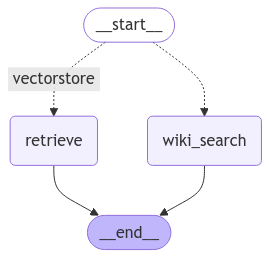

In [70]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [71]:
from pprint import pprint

# Run
inputs = {
    "question": "What is day trading strategy?"
}
for output in app.stream(inputs):
    for key, value in output.items():
        # Node
        pprint(f"Node '{key}':")
        # Optional: print full state at each node
        #pprint(value["keys"], indent=2, width=80, depth=None)
    pprint("\n---\n")

# Final generation
pprint(value['documents'])

---ROUTE QUESTION---
---ROUTE QUESTION TO Wiki SEARCH---
---wikipedia---
---HELLO--
What is day trading strategy?
"Node 'wiki_search':"
'\n---\n'
Document(metadata={}, page_content='Page: Day trading\nSummary: Day trading is a form of speculation in securities in which a trader buys and sells a financial instrument within the same trading day, so that all positions are closed befo')


In [46]:
from pprint import pprint

# Run
inputs = {
    "question": "What is day trading strategy?"
}
for output in app.stream(inputs):
    for key, value in output.items():
        # Node
        pprint(f"Node '{key}':")
        # Safely access 'keys'
        pprint(value.get("keys", "No 'keys' found"), indent=2, width=80, depth=None)
    pprint("\n---\n")

# Final generation
pprint(value.get('documents', "No 'documents' found"))


---ROUTE QUESTION---
---ROUTE QUESTION TO Wiki SEARCH---
---wikipedia---
---HELLO--
What is day trading strategy?
"Node 'wiki_search':"
"No 'keys' found"
'\n---\n'
Document(metadata={}, page_content='Page: Day trading\nSummary: Day trading is a form of speculation in securities in which a trader buys and sells a financial instrument within the same trading day, so that all positions are closed befo')


In [48]:
for output in app.stream(inputs):
    pprint(output)

---ROUTE QUESTION---
---ROUTE QUESTION TO Wiki SEARCH---
---wikipedia---
---HELLO--
What is day trading strategy?
{'wiki_search': {'documents': Document(metadata={}, page_content='Page: Day trading\nSummary: Day trading is a form of speculation in securities in which a trader buys and sells a financial instrument within the same trading day, so that all positions are closed befo'),
                 'question': 'What is day trading strategy?'}}
